In [1]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# from utils import query_connector

In [2]:
df = pd.read_csv('C:\\Users\\User\\PycharmProjects\\pums\\psam_h05.csv')
df.FS.value_counts()

FS
2.0    60584
1.0     6838
Name: count, dtype: int64

In [3]:
main_est = (df["HINCP"] * df["WGTP"]).sum() / df["WGTP"].sum()

replicate_ests = [
    (df["HINCP"] * df[f"WGTP{i}"]).sum() / df[f"WGTP{i}"].sum()
    for i in range(1, 81)
]

var = sum((r - main_est) ** 2 for r in replicate_ests) * (4 / 80)
se = var ** 0.5
moe_90 = se * 1.645  # for 90% confidence

In [9]:
df = pd.read_csv('C:\\Users\\User\\PycharmProjects\\pums\\psam_h05.csv')
df = df[df["FS"].isin([1, 2])].copy()
df["FS"] = df["FS"].apply(lambda x: 1 if x == 1 else 0)

# Select features (modify to your needs)
# features = [
#     "HINCP", "VALP", "TEN", "VEH", "NP", "RMSP",
#     "ACCESSINET", "BROADBND", "SMARTPHONE", "WIF",
# ]
features = [col for col in df.columns if col not in ['FS', 'RT', 'SERIALNO']]

# Optional: fillna or encode categorical variables
X = df[features]
# sample_weight = df["WGTP"]
y = df["FS"]

# You can leave missing values as-is with XGBoost (it handles them internally)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.1, random_state=42
)

# --------------------
# Train model
# --------------------
model = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    use_label_encoder=False,
    n_estimators=200,
    max_depth=6,
    learning_rate=0.05,
    random_state=42
)
model.fit(X_train, y_train)

# --------------------
# Evaluate
# --------------------
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


C:\Users\User\PycharmProjects\pums\venv\lib\site-packages\xgboost\core.py:158: UserWarning: [00:28:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.93      0.98      0.96      6059
           1       0.70      0.35      0.47       684

    accuracy                           0.92      6743
   macro avg       0.81      0.67      0.71      6743
weighted avg       0.91      0.92      0.91      6743



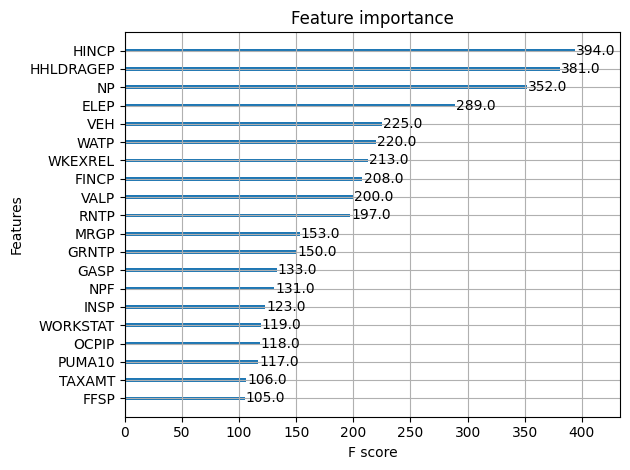

In [10]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(model, max_num_features=20)
plt.tight_layout()
plt.show()


In [ ]:
hincp, hhldragep, np, elep, beh, watp, wkexrel, fincp, valp, rntp, mrgp